# Trabajo practico 4.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

#### Data Preparation

In [2]:
#Loading data
digits= load_digits()

In [3]:
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlappin

In [4]:
digits.data.shape #64 features and 1797 samples

(1797, 64)

In [5]:
digits.target_names #10 categories

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
np.sqrt(digits.data.shape[1]) #images are 8x8

8.0

#### Exploratory Data Analysis

In [7]:
#preparing data
X= digits.data
y= digits.target
target_names= digits.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=42)
X_trainc, X_testc= X_train, X_test #copia

#Normalizamos los datos
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

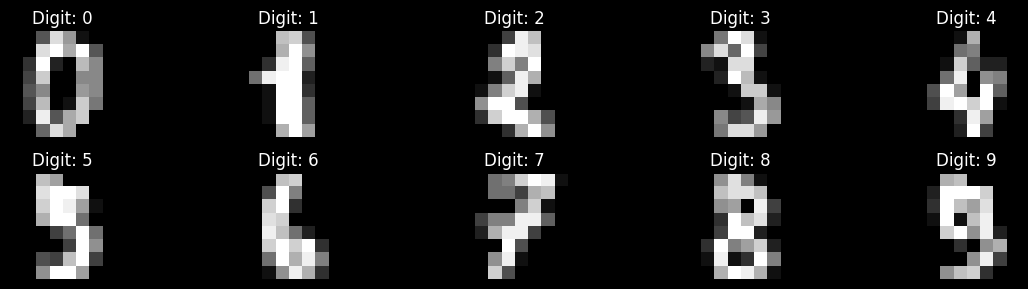

In [8]:
labels = digits.target[:10]
plt.style.use("dark_background")

plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

#### KNN and Feature Engineering with GridSearch 

Best value for k: 5
Mean test score: 0.9806799336650082


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.98      0.97        46
           2       0.94      1.00      0.97        44
           3       0.98      0.98      0.98        46
           4       0.98      0.93      0.95        45
           5       0.98      0.96      0.97        46
           6       0.98      1.00      0.99        45
           7       0.92      0.98      0.95        45
           8       0.97      0.91      0.94        43
           9       0.95      0.91      0.93        45

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



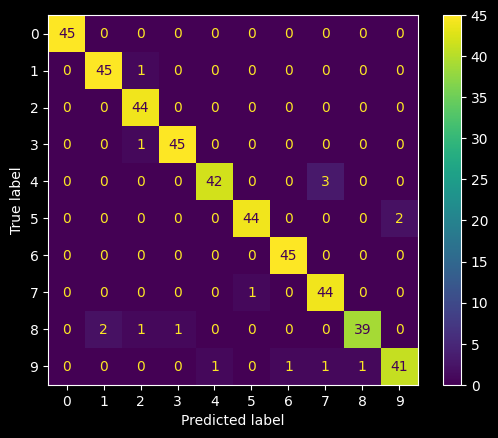

In [9]:
#Setting Model
parameters= {'n_neighbors': list(range(2,11)), 'weights':('uniform', 'distance')}
knn= KNeighborsClassifier()
clf= GridSearchCV(knn, parameters, cv=10)
clf.fit(X_train, y_train)

#Best Parameters
best_k= clf.best_params_['n_neighbors']
mean_test_score= clf.cv_results_['mean_test_score'][clf.best_index_]
print("Best value for k:", best_k)
print("Mean test score:", mean_test_score)

#Results
y_pred = clf.predict(X_test) 
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot()

#### PCA

In [10]:
#Dimension reduction
pca= PCA(n_components=30)
pca.fit(X_train) #Datos ya normalizados
print(f"Accumulated explained variance:\n",np.cumsum(pca.explained_variance_)) 

Accumulated explained variance:
 [ 7.27543205 13.17770914 18.27139145 22.36302171 25.32438214 28.04666943
 30.43684159 32.48447939 34.30375201 36.07616177 37.77472348 39.28883195
 40.67517812 42.03610066 43.22087091 44.35184848 45.42209742 46.43276043
 47.40672281 48.3172404  49.13890951 49.95394864 50.70361553 51.41998648
 52.06035629 52.64123197 53.1709187  53.68480666 54.1861686  54.65241945]


<function matplotlib.pyplot.show(close=None, block=None)>

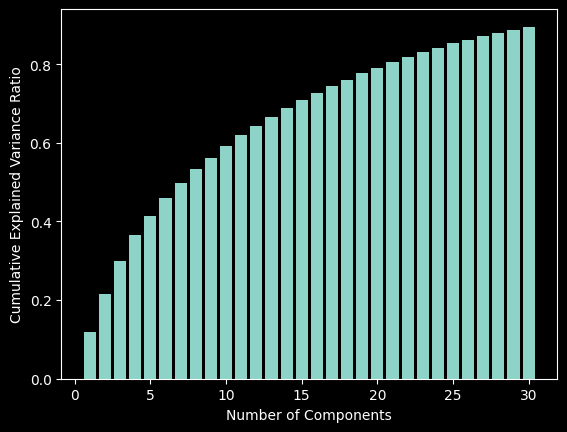

In [11]:
cum_var_ratio= np.cumsum(pca.explained_variance_ratio_)
plt.bar(np.array([i for i in range(1,31)]),cum_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show

Components that acumulate 75% of the variance

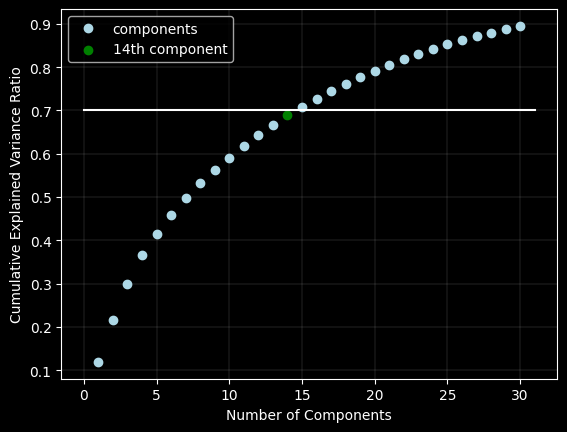

In [12]:
fig, ax= plt.subplots()
plt.plot([i for i in range(1,14)], cum_var_ratio[:13],'o',label='components',color="lightblue")
plt.plot([i for i in range(15,31)], cum_var_ratio[14:],'o',color="lightblue")
plt.scatter(14,cum_var_ratio[13],color='green',label='14th component')
plt.plot(np.linspace(0,31,100), np.ones(100)*0.7,color="white")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(linewidth=0.1)
plt.legend()
plt.show()

Inspecting inverse_transform pca

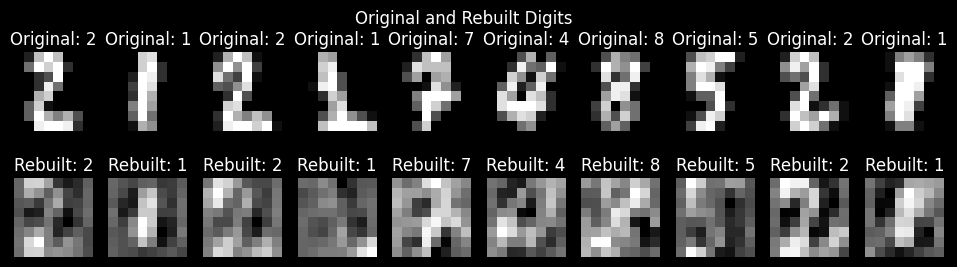

In [13]:
plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_trainc[i].reshape(8, 8), cmap='gray')
    plt.title(f'Original: {y_train[i]}')
    plt.axis('off')

scaler= StandardScaler()
X_trainc= scaler.fit_transform(X_trainc)
X_testc= scaler.transform(X_testc)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_trainc)
X_test_pca = pca.transform(X_testc)
X_test_pca = pca.transform(X_testc)
X_train_reconstructed= pca.inverse_transform(X_train_pca)
X_test_reconstructed= pca.inverse_transform(X_test_pca)

# Plot the corresponding reconstructed digits in the second row
for i in range(10):
    plt.subplot(2, 10, i + 11)
    plt.imshow(X_train_reconstructed[i].reshape(8, 8), cmap='gray')
    plt.title(f'Rebuilt: {y_train[i]}')
    plt.axis('off')

plt.suptitle('Original and Rebuilt Digits')
plt.show()

Results with PCA

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.90      0.98      0.94        46
           2       0.93      0.98      0.96        44
           3       0.96      0.98      0.97        46
           4       1.00      0.96      0.98        45
           5       0.96      0.93      0.95        46
           6       0.98      0.98      0.98        45
           7       0.91      0.96      0.93        45
           8       0.97      0.88      0.93        43
           9       0.93      0.91      0.92        45

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



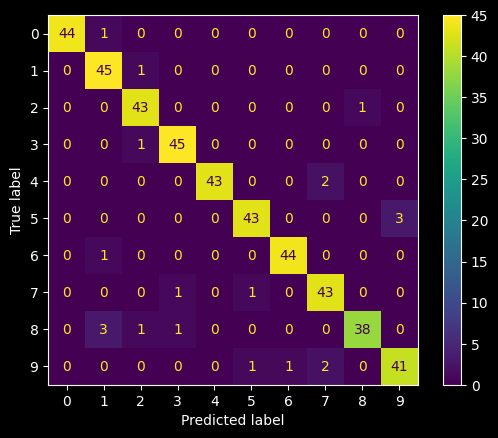

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_pca, y_train)
y_pred_rec= knn_classifier.predict(X_test_pca)

print("Classification Report:")
print(classification_report(y_test, y_pred_rec))

cm = confusion_matrix(y_test, y_pred_rec)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot()

#### Analysis with Noisy Data

In [15]:
noisy_data= np.random.normal(digits.data,2)
X_train, X_test, y_train, y_test = train_test_split(noisy_data, 
                                                digits['target'], 
                                                test_size=0.25, 
                                                stratify=y,
                                                random_state=42)

Accumulated explained variance:
 [ 180.19641836  348.68625306  491.27721608  600.6622457   672.64459141
  737.20147215  793.16056578  842.3447992   887.44423421  927.95534662
  961.6584876   992.47605843 1018.53711168 1043.30593789 1065.60744404
 1087.44384915 1107.63144382 1126.5291798  1143.03636501 1158.49770063
 1173.46637335 1187.58489412 1201.16681638 1214.08761278 1226.14190743
 1237.90461835 1249.08379018 1259.37402493 1269.24622788 1278.20690114]


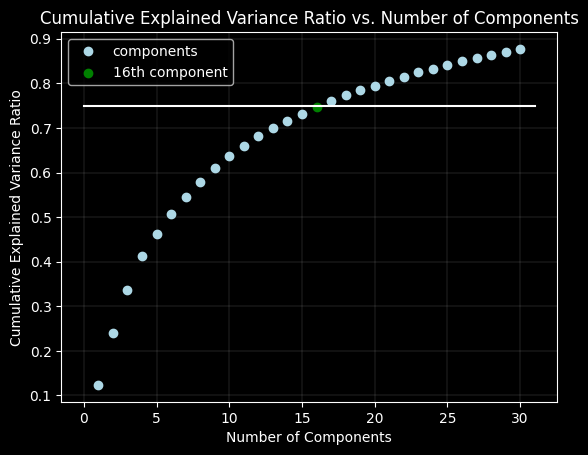

In [16]:
#Dimension reduction
pca= PCA(n_components=30)
pca.fit(X_train)
print(f"Accumulated explained variance:\n",np.cumsum(pca.explained_variance_)) 


cum_var_ratio= np.cumsum(pca.explained_variance_ratio_)
fig, ax= plt.subplots()
plt.plot([i for i in range(1,16)], cum_var_ratio[:15],'o',label='components',color="lightblue")
plt.plot([i for i in range(17,31)], cum_var_ratio[16:],'o',color="lightblue")
plt.scatter(16,cum_var_ratio[15],color='green',label='16th component')
plt.plot(np.linspace(0,31,100), np.ones(100)*0.75,color="white")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(linewidth=0.1)
plt.legend()
plt.show()

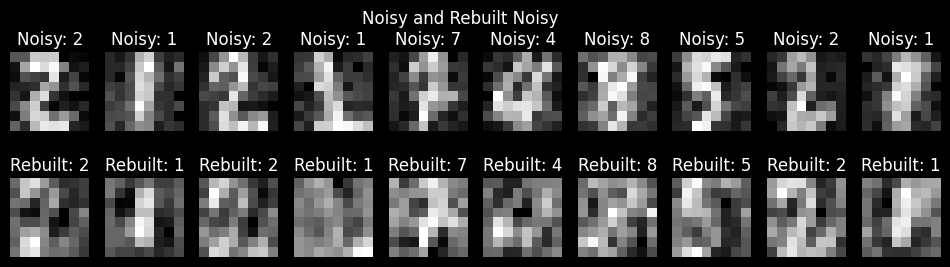

In [17]:
plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train[i].reshape(8, 8), cmap='gray')
    plt.title(f'Noisy: {y_train[i]}')
    plt.axis('off')

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_reconstructed= pca.inverse_transform(X_train_pca)
X_test_reconstructed= pca.inverse_transform(X_test_pca)

# Plot the corresponding reconstructed digits in the second row
for i in range(10):
    plt.subplot(2, 10, i + 11)
    plt.imshow(X_train_reconstructed[i].reshape(8, 8), cmap='gray')
    plt.title(f'Rebuilt: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Noisy and Rebuilt Noisy')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.81      0.93      0.87        46
           2       0.98      0.98      0.98        44
           3       0.94      1.00      0.97        46
           4       0.96      0.98      0.97        45
           5       0.91      0.91      0.91        46
           6       0.98      0.98      0.98        45
           7       0.91      0.93      0.92        45
           8       0.91      0.70      0.79        43
           9       0.93      0.91      0.92        45

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



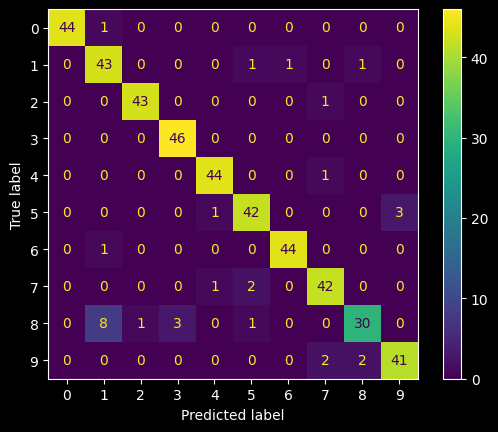

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_reconstructed, y_train)
y_pred_rec = knn_classifier.predict(X_test_reconstructed)


print("Classification Report:")
print(classification_report(y_test, y_pred_rec))

cm = confusion_matrix(y_test, y_pred_rec)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot()